In [1]:
from scipy import stats
srcc = stats.spearmanr( [5,8,-1,2], [6,1,9,3])
srcc[0]

-0.7999999999999999

In [2]:
%cd ..


d:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA


In [3]:

from test_DistillationIQA_single import DistillationIQASolver


obj = DistillationIQASolver()

In [4]:
307200 * 49 / 4

3763200.0

In [5]:
obj.ref_features_before_minus("tst_imgs/i01_23_1.bmp").shape

(1003520,)

In [6]:
import glob
TID_ADDR = "D:\quality_assessment\DS/tid2013"
dsts = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24"]


def get_images_dst(dst_type):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*_'+ dst_type +'_'+ '*' +'.*')
    return imgs

def get_mos_dst(dst_type ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1].split('_')[1] == dst_type:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


refs = glob.glob(TID_ADDR+'/reference_images/*')

refs_for_dst = []

for elem in refs:
    for i in range(5):
        refs_for_dst.append(elem)



contents = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24","25"]


def get_images_content(im_name):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*'+im_name+'_'+ '*' +'_'+ '*' +'.*')
    return imgs

def get_mos_content(im_name ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1][1:3] == im_name:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


def get_refs_content(content):
        return glob.glob(TID_ADDR+'/reference_images/*'+content+'*') * 120

In [7]:
import numpy as np
row = 3


features = []
dists = []

for c in dsts:
    imgs = get_images_dst(c)
    for i in range(len(imgs)):
        dd = obj.ref_features_before_minus(imgs[i])
        features.append(dd)
        dists.append(int(c))
        

  

    
    print(row)
    row +=1



features = np.array(features)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features)



Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'seaborn'

c:\Users\Farhad\.conda\envs\gpu\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


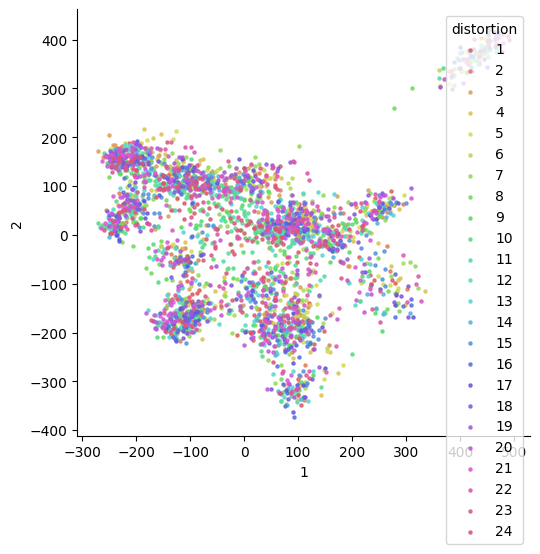

In [16]:
import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 



df = pd.DataFrame({'distortion':dists,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='distortion',palette='hls', fit_reg=False, aspect=1.1, legend_out=False,scatter_kws={"s": 5})
plt.show()

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features)

import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 

np.random.seed(176)
random.seed(16)

df = pd.DataFrame({'distortion':dists,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='distortion',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
plt.show()

In [7]:
row = 3
import numpy as np
features1 = []
contnts = []
for c in contents:
    imgs = get_images_content(c)
    for i in range(len(imgs)):
        dd = obj.ref_features_before_minus(imgs[i])
        features1.append(dd)
        contnts.append(c)

  

    
    print(row)
    row +=1



features1 = np.array(features1)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


NameError: name 'np' is not defined

In [8]:
import numpy as np
features1 = np.array(features1)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 

pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)



c:\Users\Farhad\.conda\envs\gpu\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


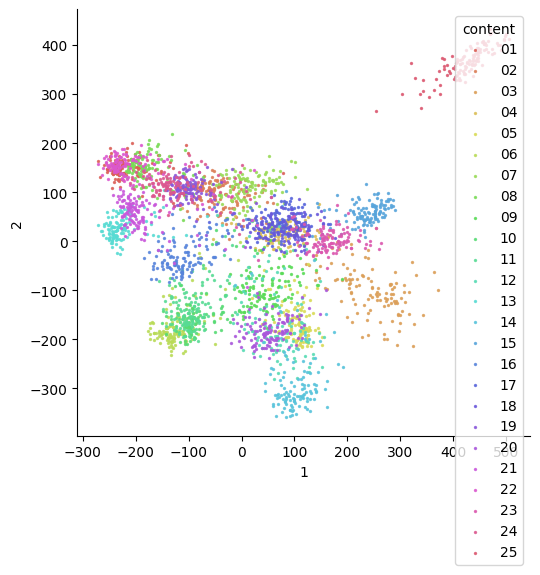

In [13]:
df = pd.DataFrame({'content':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False, aspect=1.1, legend_out=False,scatter_kws={"s": 2})
plt.show()

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
plt.show()